In [36]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch

In [2]:
#Read the given data
Data = pd.read_csv('wine.csv')
Data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
#Taking required data for calculation
Data1 = Data.iloc[:,1:]
Data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


* In the given data no String values are present and no null values.
* Already they clusterd the data we can the cluster lables values in the type column.
* We can ignore the types column for calculating PC'S

In [6]:
# Standardization the numerical data 
Data_std = StandardScaler()
Data_norm=Data_std.fit_transform(Data1)
Data_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

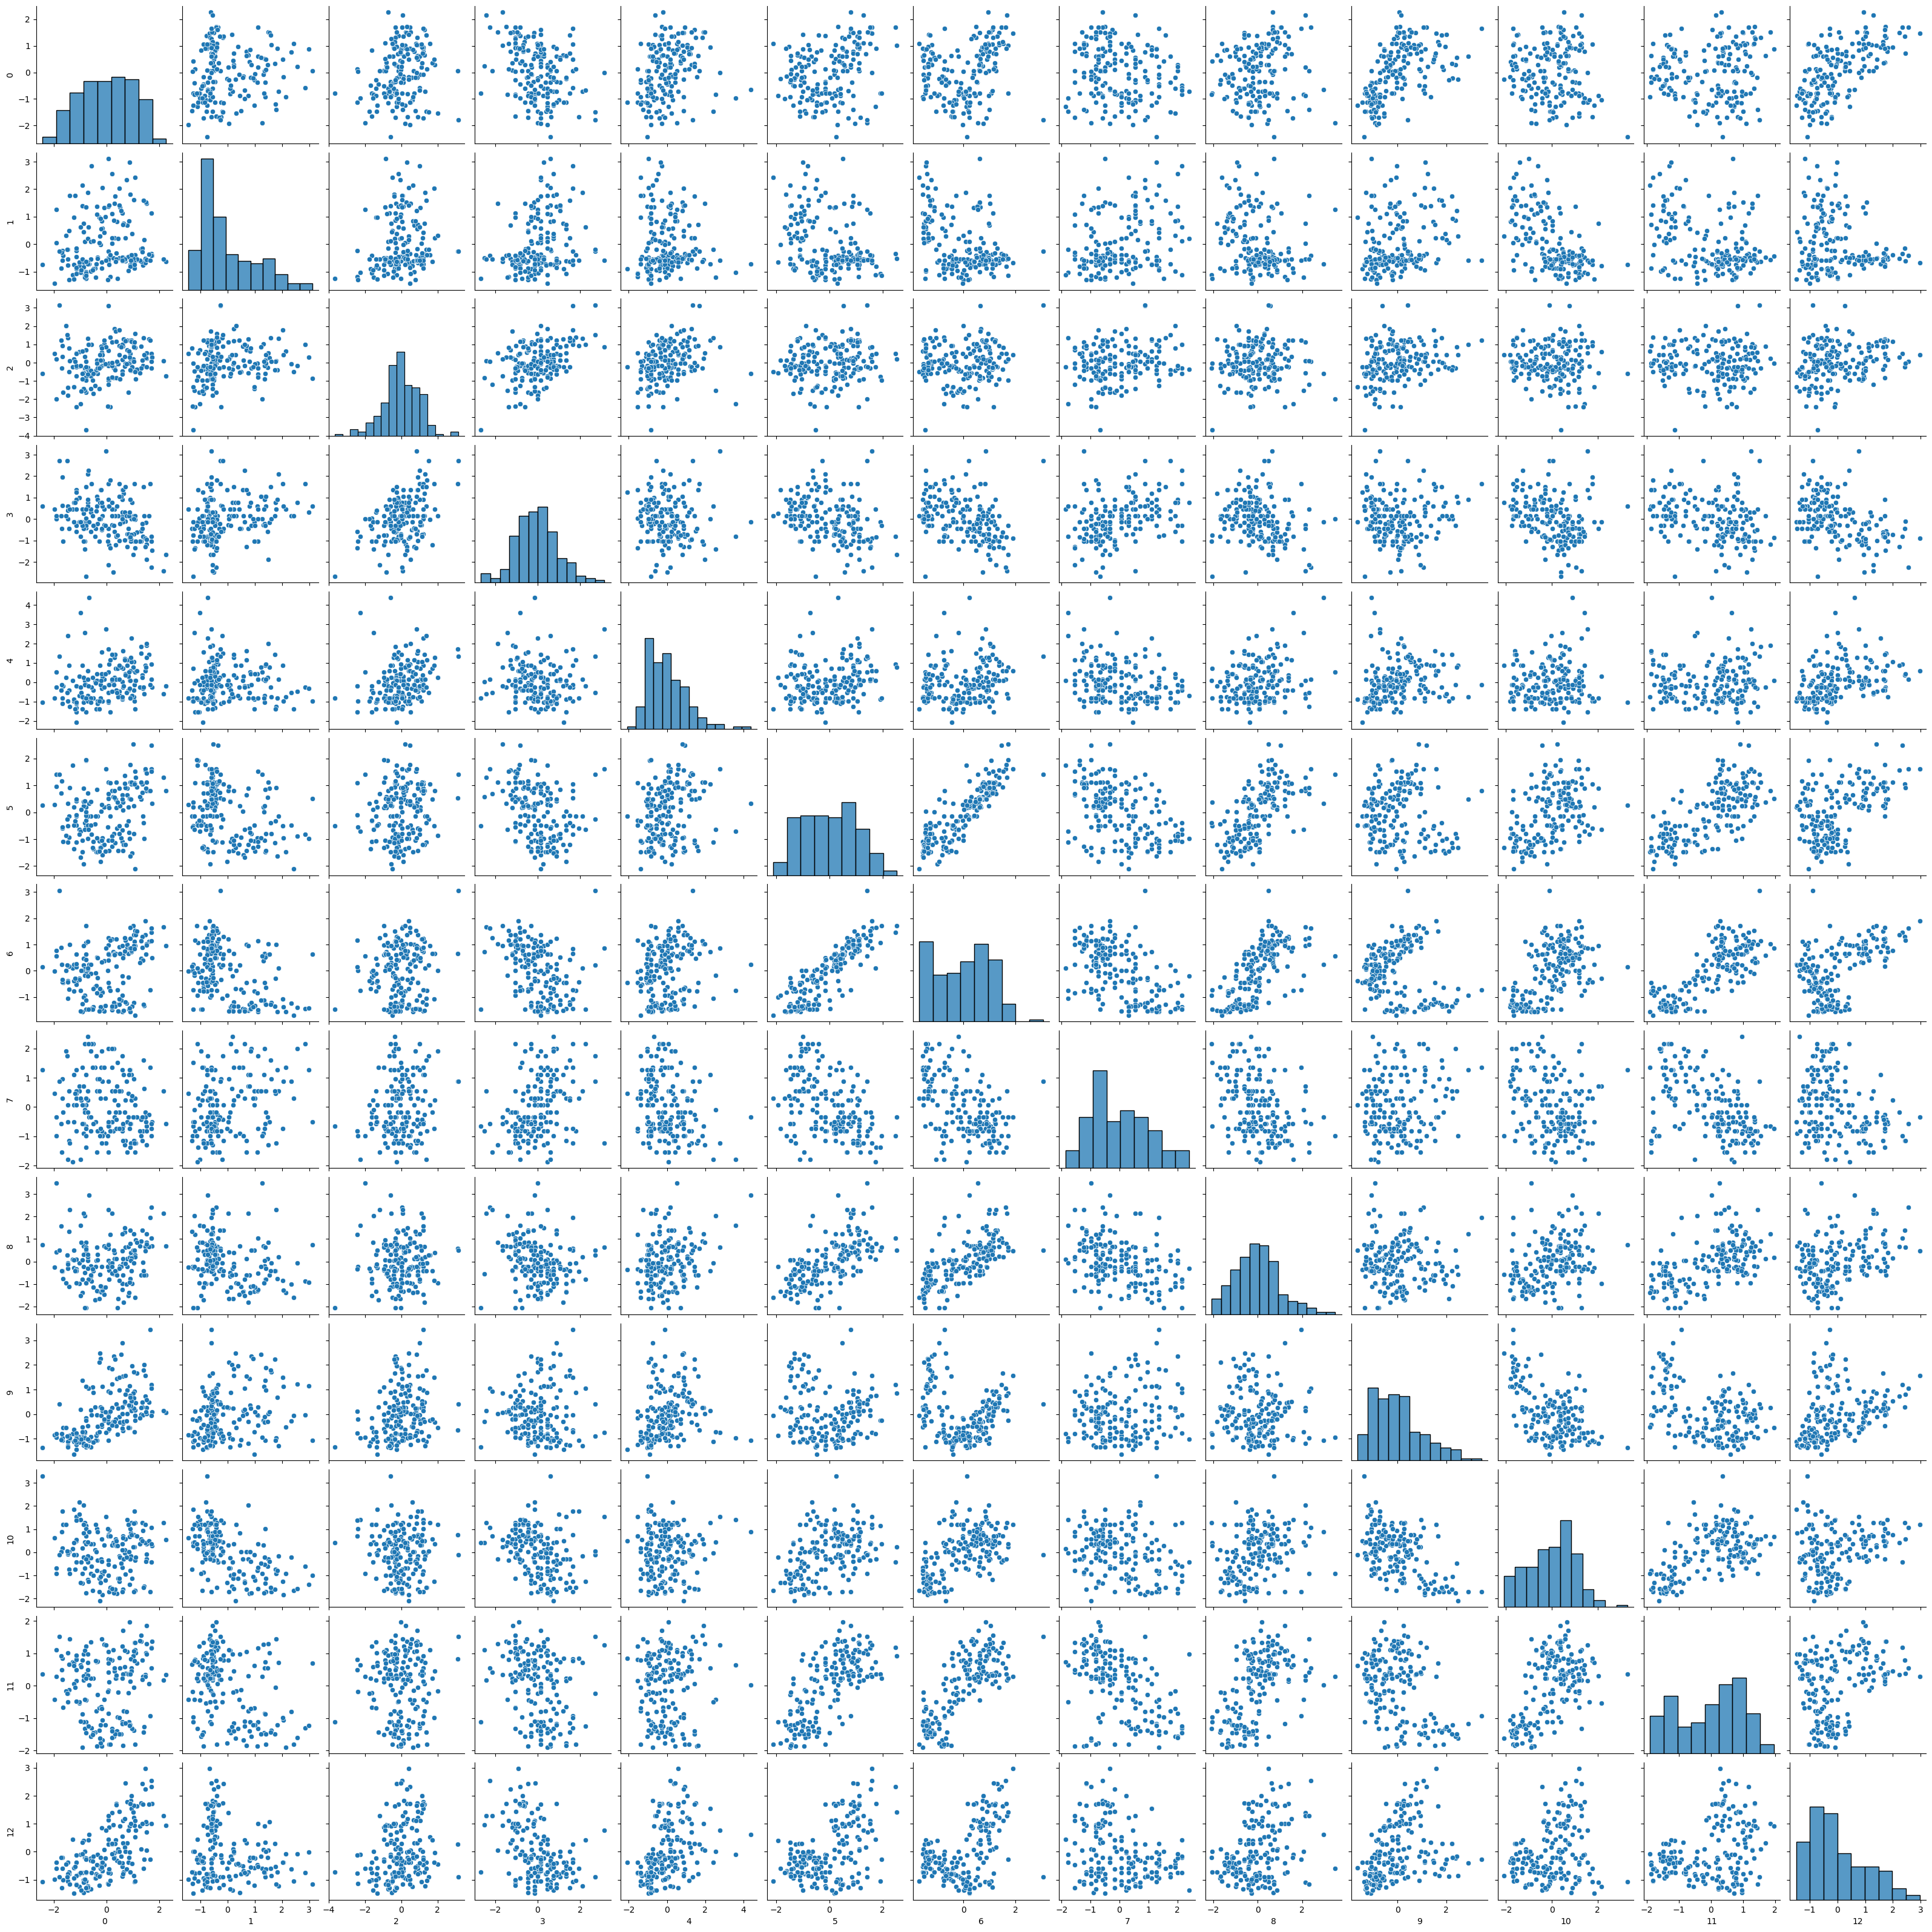

In [7]:
#Using pairplot to identify the correlation and patterns between the data
sns.pairplot(pd.DataFrame(Data_norm))

In [13]:
#Creating covariance matrix using Normalizite data
cov_matrix = np.cov(Data_norm, rowvar=False)
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [47]:
#Caluculating Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("EigenValues :",eigenvalues)
print("EigenVectors :",eigenvectors)


EigenValues : [0.10396199 0.16972374 0.22706428 0.25232001 0.29051203 0.35046627
 0.55414147 0.64528221 0.85804868 0.92416587 1.45424187 2.51108093
 4.73243698]
EigenVectors : [[ 0.01496997  0.26628645  0.22591696  0.21160473  0.50861912 -0.39613926
   0.05639636 -0.21353865 -0.26566365 -0.0178563   0.20738262  0.48365155
  -0.1443294 ]
 [ 0.02596375 -0.12169604 -0.07648554 -0.30907994 -0.07528304 -0.06582674
  -0.42052391 -0.53681385  0.03521363  0.53689028 -0.08901289  0.22493093
   0.24518758]
 [-0.14121803  0.04962237  0.49869142 -0.02712539 -0.30769445  0.17026002
   0.14917061 -0.15447466 -0.14302547 -0.21417556 -0.6262239   0.31606881
   0.00205106]
 [ 0.09168285  0.05574287 -0.47931378  0.05279942  0.20044931 -0.42797018
   0.28696914  0.10082451  0.06610294  0.06085941 -0.61208035 -0.0105905
   0.23932041]
 [ 0.05677422 -0.06222011 -0.07128891  0.06787022  0.27140257  0.15636143
  -0.3228833  -0.03814394  0.72704851 -0.35179658 -0.13075693  0.299634
  -0.14199204]
 [-0.4639079

In [19]:
#Sorting Eigenvalue and Eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]
print("Sorted_index :",sorted_index)
print("Sorted_eigenvalues :",sorted_eigenvalues)
print("Sorted_eigenvectors :",sorted_eigenvectors)

Sorted_index : [12 11 10  9  8  7  6  5  4  3  2  1  0]
Sorted_eigenvalues : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
Sorted_eigenvectors : [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365 -0.21353865
   0.05639636 -0.39613926  0.50861912  0.21160473  0.22591696  0.26628645
   0.01496997]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363 -0.53681385
  -0.42052391 -0.06582674 -0.07528304 -0.30907994 -0.07648554 -0.12169604
   0.02596375]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547 -0.15447466
   0.14917061  0.17026002 -0.30769445 -0.02712539  0.49869142  0.04962237
  -0.14121803]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294  0.10082451
   0.28696914 -0.42797018  0.20044931  0.05279942 -0.47931378  0.05574287
   0.09168285]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851 -0.03814394
  -0.3228833   0.15636143  0

In [27]:
#Forming principal components values
n_components = 3
principal_components = np.dot(Data_norm, sorted_eigenvectors[:, :n_components])
principal_components


array([[-3.31675081e+00,  1.44346263e+00,  1.65739045e-01],
       [-2.20946492e+00, -3.33392887e-01,  2.02645737e+00],
       [-2.51674015e+00,  1.03115130e+00, -9.82818670e-01],
       [-3.75706561e+00,  2.75637191e+00,  1.76191842e-01],
       [-1.00890849e+00,  8.69830821e-01, -2.02668822e+00],
       [-3.05025392e+00,  2.12240111e+00,  6.29395827e-01],
       [-2.44908967e+00,  1.17485013e+00,  9.77094891e-01],
       [-2.05943687e+00,  1.60896307e+00, -1.46281883e-01],
       [-2.51087430e+00,  9.18070957e-01,  1.77096903e+00],
       [-2.75362819e+00,  7.89437674e-01,  9.84247490e-01],
       [-3.47973668e+00,  1.30233324e+00,  4.22735217e-01],
       [-1.75475290e+00,  6.11977229e-01,  1.19087832e+00],
       [-2.11346234e+00,  6.75706339e-01,  8.65086426e-01],
       [-3.45815682e+00,  1.13062988e+00,  1.20427635e+00],
       [-4.31278391e+00,  2.09597558e+00,  1.26391275e+00],
       [-2.30518820e+00,  1.66255173e+00, -2.17902616e-01],
       [-2.17195527e+00,  2.32730534e+00

In [30]:
#Given columns names for each Principal components
pca_components1=pd.DataFrame(principal_components,columns=['pc1','pc2','pc3'])
pca_components1

,pc1,pc2,pc3
0,-3.316751,1.443463,0.165739
1,-2.209465,-0.333393,2.026457
2,-2.516740,1.031151,-0.982819
3,-3.757066,2.756372,0.176192
4,-1.008908,0.869831,-2.026688
...,...,...,...
173,3.370524,2.216289,0.342570
174,2.601956,1.757229,-0.207581
175,2.677839,2.760899,0.940942
176,2.387017,2.297347,0.550696


In [31]:
#Checking correlation between Principal components
pca_components.corr()

,pc1,pc2,pc3
pc1,1.000000e+00,-3.435312e-16,-1.367641e-16
pc2,-3.435312e-16,1.000000e+00,-1.496763e-16
pc3,-1.367641e-16,-1.496763e-16,1.000000e+00


In [32]:
# Cumulative variance 
Cumulative_variance  = np.cumsum(np.round(sorted_eigenvalues,decimals = 4)*100)
Cumulative_variance

array([ 473.24,  724.35,  869.77,  962.19, 1047.99, 1112.52, 1167.93,
       1202.98, 1232.03, 1257.26, 1279.97, 1296.94, 1307.34])

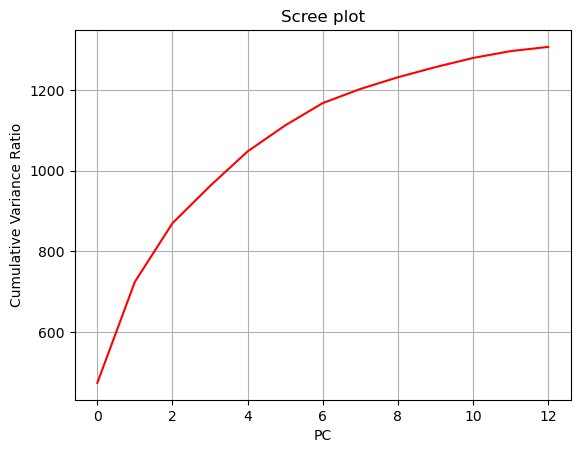

In [33]:
# Variance plot for PCA components obtained  Scree plot
plt.plot(Cumulative_variance,color="red")
plt.title('Scree plot')
plt.xlabel("PC")
plt.ylabel("Cumulative Variance Ratio")
plt.grid()
plt.show()

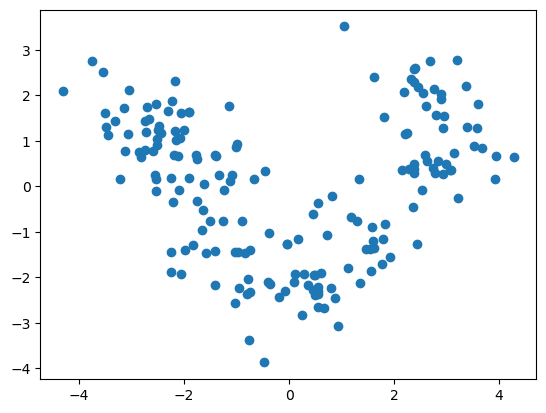

In [34]:
# plot between PCA1 and PCA2 
x = pca_components.iloc[:,0:1]
y = pca_components.iloc[:,1:2]
plt.scatter(x,y)

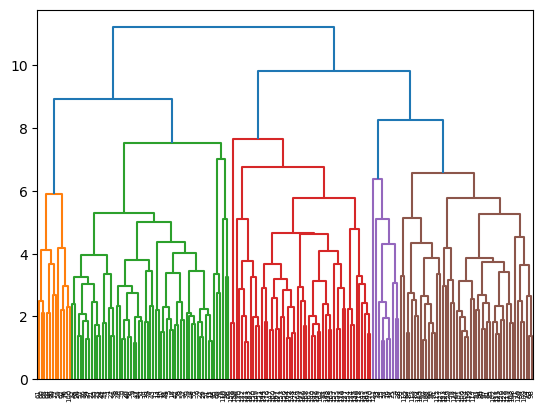

In [37]:
#Hierarchical cluster with original norm data
dendrogram = sch.dendrogram(sch.linkage(Data_norm, method='complete'))

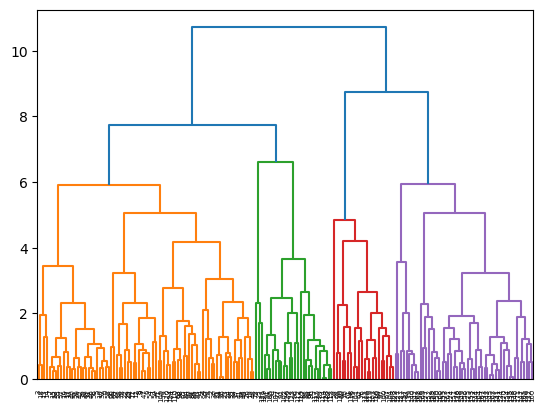

In [38]:
#Hierarchical cluster with PC data
dendrogram = sch.dendrogram(sch.linkage(pca_components, method='complete'))

In [39]:
pca_components1 = pd.concat([pd.DataFrame(pca_components.iloc[:,0:3],columns=['pc1','pc2','pc3']), Data[['Type']]], axis = 1)

In [40]:
pca_components1

,pc1,pc2,pc3,Type
0,-3.316751,1.443463,0.165739,1
1,-2.209465,-0.333393,2.026457,1
2,-2.516740,1.031151,-0.982819,1
3,-3.757066,2.756372,0.176192,1
4,-1.008908,0.869831,-2.026688,1
...,...,...,...,...
173,3.370524,2.216289,0.342570,3
174,2.601956,1.757229,-0.207581,3
175,2.677839,2.760899,0.940942,3
176,2.387017,2.297347,0.550696,3


<Axes: xlabel='pc1', ylabel='pc2'>

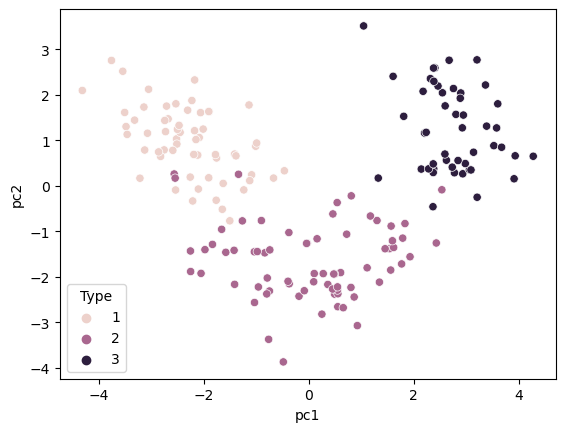

In [46]:
sns.scatterplot(data=pca_components1,x='pc1',y='pc2',hue='Type')